In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb
from random import randrange

In [68]:
masterData = pd.read_csv('gameLevel.csv', index_col=0)
gameData = masterData.copy()
masterData

,game_date,win/loss,ΔPE,ΔPE_10d,Log5,Whisnant,ΔOBP,ΔOBP_10d,ΔSLG,ΔSLG_10d,SP_ERA,opponent_SP_ERA,ΔERA,ΔWHIP,ΔWHIP_10d,ΔFIP,ΔRA_variance
0,2000-05-01,0.0,0.225534,0.349611,0.712574,0.626283,0.02680,0.03155,0.01638,0.09580,6.33,5.01,-1.8634,-0.1894,-0.21694,-0.28194,1.302627
1,2000-05-01,0.0,-0.117058,-0.017102,0.500000,0.492624,0.00194,0.00486,0.04238,0.05052,5.20,5.12,1.4910,0.1129,0.44984,1.42348,0.761296
2,2000-05-01,0.0,-0.036871,0.168035,0.318179,0.588245,0.00175,0.01670,0.04014,0.02216,4.11,3.38,0.8972,0.1786,0.09465,1.27970,-0.586304
3,2000-05-01,1.0,-0.133568,-0.031010,0.335589,0.515791,0.01755,-0.00729,0.00778,0.00353,4.73,2.57,2.0642,0.3860,0.62353,1.29577,-0.378339
4,2000-05-01,0.0,-0.105874,-0.596740,0.482763,0.334315,-0.03854,-0.09203,-0.03875,-0.07553,6.11,5.04,-1.1062,0.0105,-0.03445,0.39801,0.419179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41114,2019-09-29,1.0,0.171002,-0.107356,0.678307,0.592622,0.02876,-0.01592,0.05014,-0.04985,3.80,7.71,-0.8940,-0.0754,0.26351,-1.27734,0.831274
41115,2019-09-29,1.0,-0.032996,0.154866,0.424606,0.465258,-0.00857,0.00797,-0.01039,0.06714,4.30,2.60,0.0581,-0.0515,0.07389,-0.30324,-0.103719
41116,2019-09-29,1.0,-0.139157,0.092240,0.319915,0.472948,-0.02113,0.01019,-0.00425,0.03649,7.00,4.21,1.1826,0.2598,0.36434,1.19332,-0.398356
41117,2019-09-29,1.0,-0.152471,-0.103326,0.340449,0.427517,-0.02087,0.01428,-0.06016,-0.00498,3.76,4.24,0.7739,0.1644,0.53308,0.38177,-0.551985


In [5]:
def hyperParameterTuneERA(dataFrame, ERA):
  SPnull = dataFrame['SP_ERA'].isnull()
  oSPnull = dataFrame['opponent_SP_ERA'].isnull()
  for i in range(len(dataFrame)):
    if SPnull[i] == True or (ord(str(dataFrame.iloc[i][dataFrame.columns.get_loc('SP_ERA')])[0]) < 48 or ord(str(dataFrame.iloc[i][dataFrame.columns.get_loc('SP_ERA')])[0]) > 57):
      dataFrame.iloc[i, dataFrame.columns.get_loc('SP_ERA')] = ERA
    if oSPnull[i] == True or (ord(str(dataFrame.iloc[i][dataFrame.columns.get_loc('opponent_SP_ERA')])[0]) < 48 or ord(str(dataFrame.iloc[i][dataFrame.columns.get_loc('opponent_SP_ERA')])[0]) > 57):
      dataFrame.iloc[i, dataFrame.columns.get_loc('opponent_SP_ERA')] = ERA
  return dataFrame

In [7]:
# After some backtesting, if a pitcher has no previous ERA, the optimal
# parameter we set his ERA to is 7.25
gameData = hyperParameterTuneERA(gameData, 7.25)
gameData['ΔSP_ERA'] = gameData['SP_ERA'] - gameData['opponent_SP_ERA']
del gameData['SP_ERA']
del gameData['opponent_SP_ERA']

Correlation Heatmap

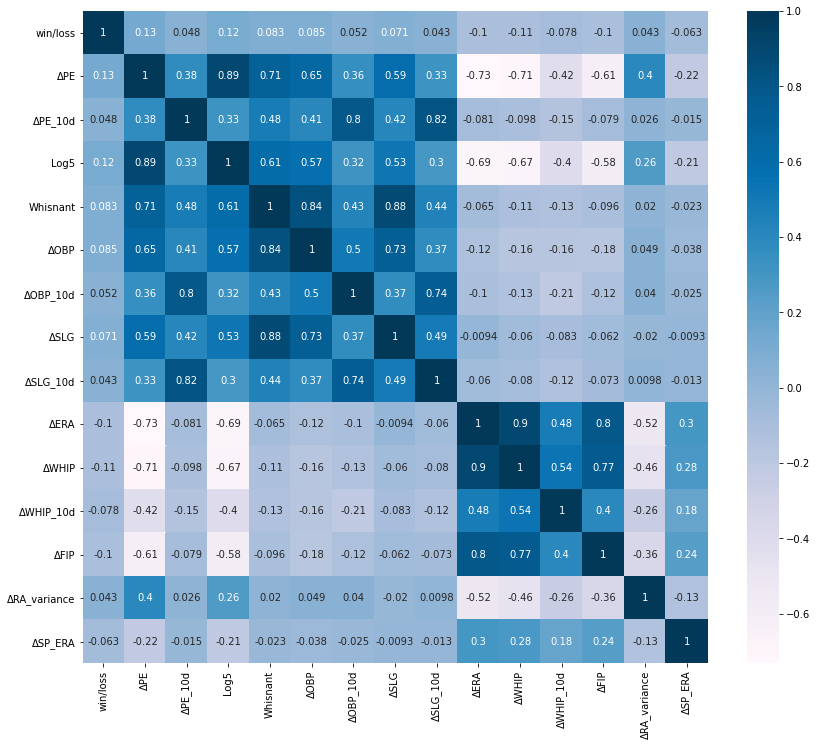

In [32]:
plt.figure(figsize=(14,12))
heatmap = sb.heatmap(gameData.corr(), annot=True, cmap='PuBu')

In [ ]:
# remove ERA as it has high multicolinearity with other pitching stats
# and less direct correlation with out target variable
del copy['ΔERA']

Distributions of Key Variables

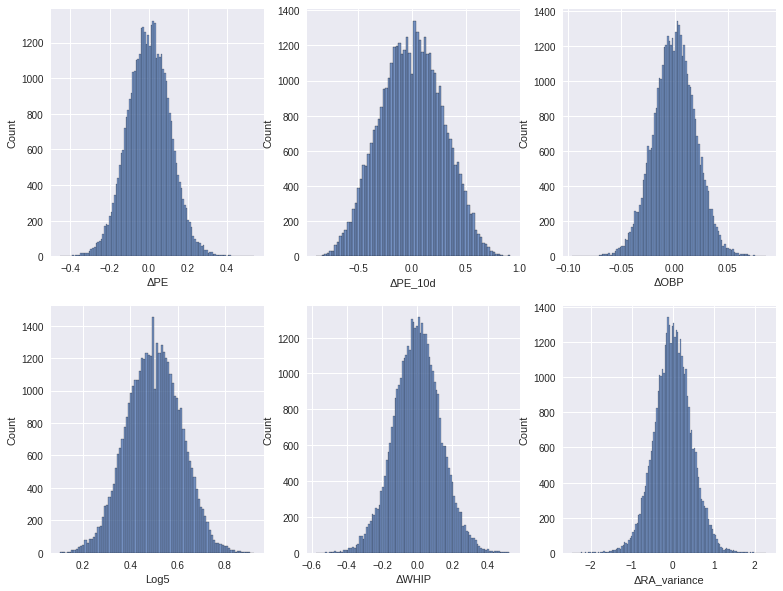

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(13,10))
sb.histplot(gameData['ΔPE'], ax=axes[0,0])
sb.histplot(gameData['ΔPE_10d'], ax=axes[0,1])
sb.histplot(gameData['ΔOBP'], ax=axes[0,2])
sb.histplot(gameData['Log5'], ax=axes[1,0])
sb.histplot(gameData['ΔWHIP'], ax=axes[1,1])
sb.histplot(gameData['ΔRA_variance'], ax=axes[1,2])
plt.style.use('ggplot')
plt.show()